## 2-1. 훈련 세트와 테스트 세트

In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [3]:
cond = df['Species'].isin(['Bream', 'Smelt']) 
# isin(): 2개 이상의 데이터 유무를 판단할 때 사용
lw_df = df.loc[cond, ['Length2', 'Weight']]
lw_df.values # 2차원 numpy의 list 형태
fish_data = lw_df.values.tolist()

In [4]:
fish_target = [1] * 35 + [0] * 14

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [6]:
# 훈련 세트
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트
test_input = fish_data[35:]
test_target = fish_target[35:]

In [7]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 샘플링 편향

- 훈련 세트에는 도미만, 테스트 세트에는 빙어만 들어있음 → 데이터를 섞어줘야 함

### 넘파이

In [8]:
import numpy as np

In [9]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

input_arr.shape # (샘플 수, 특성 수)

(49, 2)

In [10]:
index = np.arange(49)
np.random.shuffle(index)
print(index)

[28 30 33  2 44 48 47 27  7 18  4 22 19 15 16 45 46 10 20 38 24 36 32 23
 35 13 11 42 34  3 17 37 26  5 39 12 29 25  8 43  6 31 40 41 14  0  9  1
 21]


In [13]:
# 데이터를 섞어서 일부분을 사용
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(train_input)

[[ 36.  850. ]
 [ 38.5 920. ]
 [ 41.  975. ]
 [ 26.5 340. ]
 [ 12.2  12.2]
 [ 15.   19.9]
 [ 14.3  19.7]
 [ 36.  714. ]
 [ 30.  390. ]
 [ 33.5 610. ]
 [ 29.  430. ]
 [ 34.5 620. ]
 [ 33.5 650. ]
 [ 32.  600. ]
 [ 33.  700. ]
 [ 12.4  13.4]
 [ 13.   12.2]
 [ 31.  475. ]
 [ 34.  575. ]
 [ 11.    9.7]
 [ 35.  700. ]
 [ 10.5   7.5]
 [ 39.5 925. ]
 [ 35.  680. ]
 [  9.8   6.7]
 [ 32.  340. ]
 [ 31.  500. ]
 [ 11.8   9.9]
 [ 41.  950. ]
 [ 29.  363. ]
 [ 33.  700. ]
 [ 10.6   7. ]
 [ 35.  720. ]
 [ 29.7 450. ]
 [ 11.2   9.8]]


In [12]:
import matplotlib.pyplot as plt

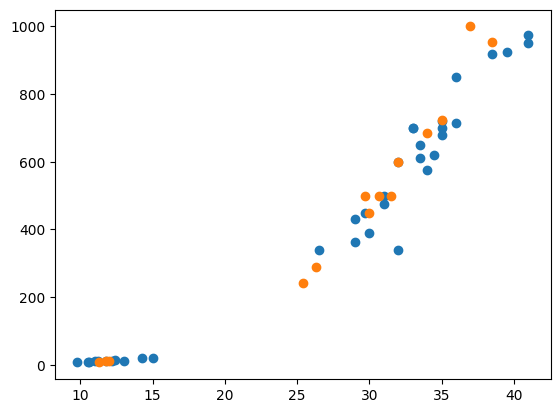

In [14]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
# 데이터들이 잘 섞였는지 확인

In [15]:
kn.fit(train_input, train_target) # 35개 학습
kn.score(test_input, test_target) # 14게 체잠

1.0

In [16]:
kn.predict(test_input)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [17]:
test_target # 똑같다

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])